# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } n_{g}$

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [17]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Qubit parameters 1 

phi_ext=np.pi

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculation 1
Energies=[]
Energies2=[]

#1

#ng=np.arange(0.5-0.01*0.5 , 0.5+0.01*0.5 + 0.001 , 0.01*0.5)
#ng2=np.arange(0.5-0.01*0.5 , 0.5+0.01*0.5 + 0.001 , 0.01*0.5)
#print(r"(1%) \epsilon_n = ",0.01*0.5)
#epsilon_n=0.01*0.5
#print(ng)

#2

#ng=np.arange(0.5-0.015*0.5 , 0.5+0.015*0.5 + 0.001 , 0.015*0.5)
#ng2=np.arange(0.5-0.015*0.5 , 0.5+0.015*0.5 + 0.001 , 0.015*0.5)
#print(r"(1.5%) \epsilon_n = ",0.015*0.5)
#epsilon_n=0.015*0.5
#print(ng)

#3

ng=np.arange(0.5-0.005*0.5 , 0.5+0.005*0.5 + 0.001 , 0.005*0.5)
ng2=np.arange(0.5-0.005*0.5 , 0.5+0.005*0.5 + 0.001 , 0.005*0.5)
print(r"(0.5%) \epsilon_n = ",0.005*0.5)
epsilon_n=0.005*0.5
print(ng)

#4

#ng=np.arange(0.5-0.0075*0.5 , 0.5+0.0075*0.5 + 0.001 , 0.0075*0.5)
#ng2=np.arange(0.5-0.0075*0.5 , 0.5+0.0075*0.5 + 0.001 , 0.0075*0.5)
#print(r"(0.75%) \epsilon_n = ",0.0075*0.5)
#epsilon_n=0.0075*0.5
#print(ng)

(0.5%) \epsilon_n =  0.0025
[0.4975 0.5    0.5025]


In [7]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

## $\text{1. Plot for } E_{Cs} = E_{Cj} = E_L = 1$, $\varphi_{ext}= \pi$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [18]:
# Calculations 1

for n1 in ng:
    print("Step for ng = ",n1)
    H=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,n1,phi_ext,alpha)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    vals, _ = eigsh(H, k=2, which='SA')
    #vals,_=np.linalg.eigh(H)
    print(vals[0],vals[1])
    print("Eigenvalues calculated")
    Energies.append(vals)

Step for ng =  0.4975
Hamiltonian built, len(H)= 4372281
1.7634693699015285 1.7804173567684993
Eigenvalues calculated
Step for ng =  0.5
Hamiltonian built, len(H)= 4372281
1.7719316412969037 1.7719316412969999
Eigenvalues calculated
Step for ng =  0.5025
Hamiltonian built, len(H)= 4372281
1.763469369901948 1.780417356768732
Eigenvalues calculated


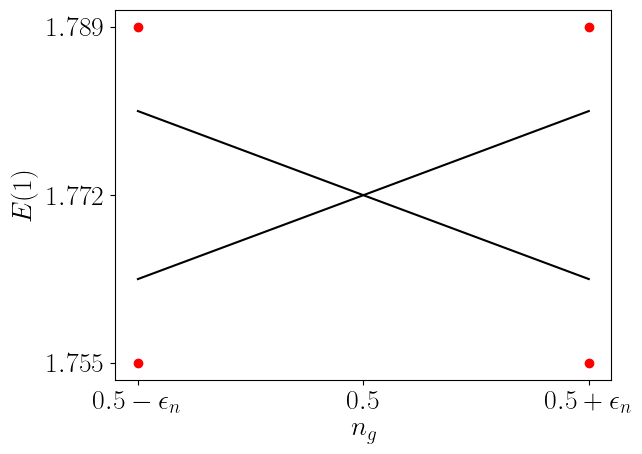

In [19]:
#Plot 1 
#Energiesng = np.array(Energies)
#np.save('Energiesng.npy', Energiesng)
plt.plot(ng,Energies,c="k")
#plt.ylim(1.67,1.87)
#plt.xlim(0.4,0.6)
plt.plot(0.5-epsilon_n,1.7550311282877298, 'ro')
plt.plot(0.5-epsilon_n,1.7889259142999712, 'ro')
plt.plot(0.5+epsilon_n,1.7550311282877298, 'ro')
plt.plot(0.5+epsilon_n,1.7889259142999712, 'ro')
plt.xticks([0.5-epsilon_n,0.500,0.5+epsilon_n],[r"$0.5-\epsilon_n$",r"$0.5$",r"$0.5+\epsilon_n$"])
plt.yticks([1.7550311282877298,1.7719316405392005,1.7889259142999712],[r"$1.755$",r"$1.772$",r"$1.789$"])
plt.xlabel('$n_g$')
plt.ylabel('$E (1)$',labelpad=7.0)
#plt.savefig('Energies_vs_ng_M50N125_INTNO2.pdf')
plt.show()

## $\text{2. Plot for } E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $\varphi_{ext} = \pi$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [20]:
# Calculations 2

for n2 in ng2:
    print("Step for ng = ",n2)
    H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,n2,phi_ext,alpha2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2,vects2=np.linalg.eigh(H2)
    vals2, _ = eigsh(H2, k=2, which='SA')
    #vals2,_=np.linalg.eigh(H2)
    print(vals2[0],vals2[1])
    print("GAP between GS and 1st excited state is = ",vals2[1]-vals2[0])
    print("Eigenvalues calculated")
    Energies2.append(vals2)

Step for ng =  0.4975
Hamiltonian built, len(H)= 4372281
0.27464858605888687 0.275624054172971
GAP between GS and 1st excited state is =  0.0009754681140841104
Eigenvalues calculated
Step for ng =  0.5
Hamiltonian built, len(H)= 4372281
0.27513511904323534 0.2751351190432399
GAP between GS and 1st excited state is =  4.551914400963142e-15
Eigenvalues calculated
Step for ng =  0.5025
Hamiltonian built, len(H)= 4372281
0.274648586058883 0.2756240541729512
GAP between GS and 1st excited state is =  0.0009754681140682342
Eigenvalues calculated


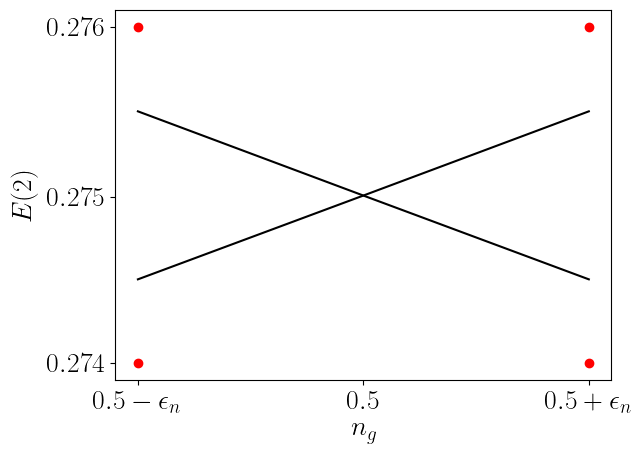

In [21]:
#Plot 2 
#Energies2ng = np.array(Energies2)
#np.save('Energies2ng_equalgap_3.npy', Energies2ng)
plt.plot(ng2,Energies2,c="k")
plt.plot(0.5-epsilon_n,0.2741644560315928, 'ro')
plt.plot(0.5-epsilon_n,0.2761153906221432, 'ro')
plt.plot(0.5+epsilon_n,0.2741644560315928, 'ro')
plt.plot(0.5+epsilon_n,0.2761153906221432, 'ro')
plt.xticks([0.5-epsilon_n,0.500,0.5+epsilon_n],[r"$0.5-\epsilon_n$",r"$0.5$",r"$0.5+\epsilon_n$"])
plt.yticks([0.2741644560315928,0.2751284142050514,0.2761153906221432],[r"$0.274$",r"$0.275$",r"$0.276$"])
#plt.ylim(1.25,2.25)
#plt.xlim(0.4,0.6)
plt.xlabel('$n_g$')
plt.ylabel('$E (2)$', labelpad=7.0)
#plt.savefig('Energies2_vs_ng_M50N125_INTNO2.pdf')
plt.show()